# Creating and Backtesting Stochastic Oscillator Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
pd.read_csv("../original/EURUSD_ohlc.csv")

,Unnamed: 0,Open,High,Low,Close
0,2008-01-01,1.45905,1.47502,1.45885,1.47146
1,2008-01-02,1.47146,1.47812,1.46876,1.47510
2,2008-01-03,1.47504,1.48254,1.46958,1.47429
3,2008-01-05,1.47451,1.47559,1.47430,1.47465
4,2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...,...
3806,2020-12-23,1.21873,1.22158,1.21774,1.21849
3807,2020-12-27,1.21892,1.22504,1.21812,1.22152
3808,2020-12-28,1.22145,1.22752,1.22086,1.22502
3809,2020-12-29,1.22508,1.23102,1.22495,1.23000


In [4]:
data = pd.read_csv("../original/EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
dtypes: float64(4)
memory usage: 148.9 KB


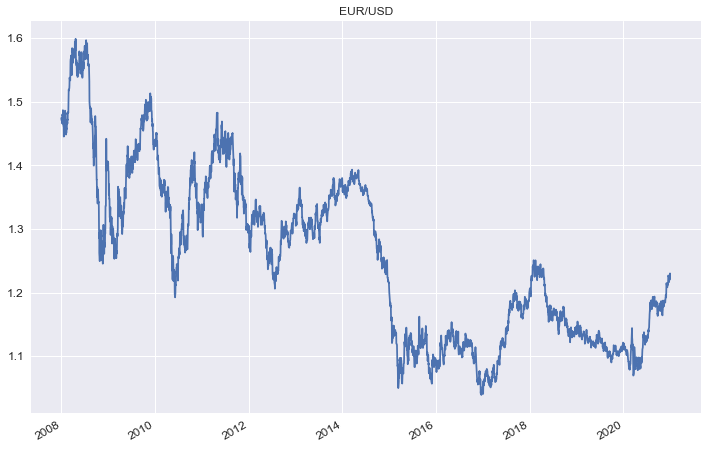

In [6]:
data.Close.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

## Defining an SO Strategy

In [7]:
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


The __Stochastic Oscillator Indicator__ consists of two different lines/oscillators that are bounded by __0 and 100__: <br>
- __Fast Stochastic Indicator__ (%K line)
- __Slow Stochastic Indicator__ (%D line)

__How to calculate %K__

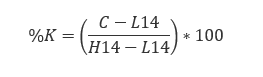

where: <br>
C = the most recent closing price <br>
L14: the minimum price in the last 14 days<br>
H14: the maximum price in the last 14 days

In [8]:
periods = 14

In [9]:
data["roll_low"] = data.Low.rolling(periods).min()

In [10]:
data["roll_high"] = data.High.rolling(periods).max()

In [11]:
data

,Open,High,Low,Close,roll_low,roll_high
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN
...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102


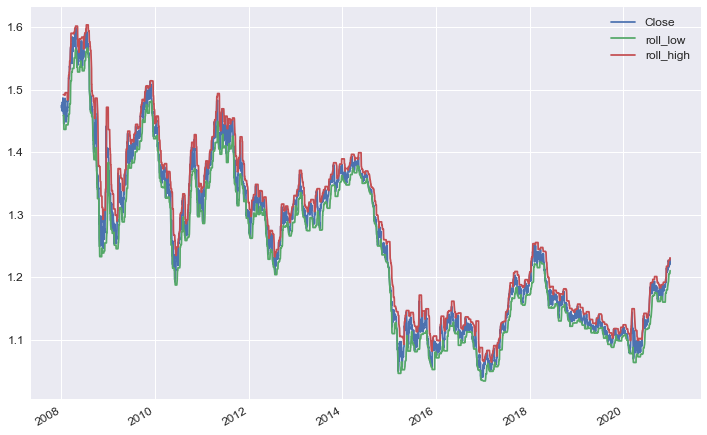

In [12]:
data.loc[:, ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

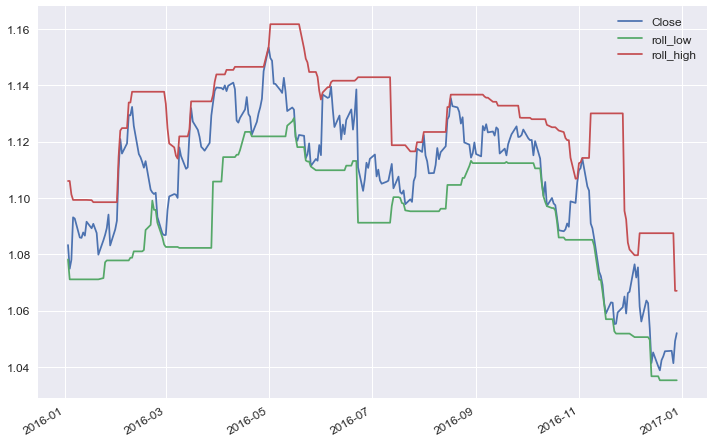

In [13]:
data.loc["2016", ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [14]:
data["K"] = (data.Close - data.roll_low) / (data.roll_high - data.roll_low) * 100

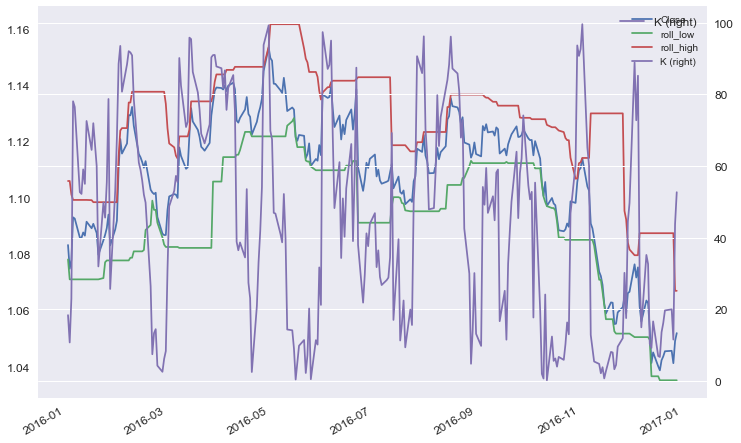

In [15]:
data.loc["2016", ["Close", "roll_low", "roll_high", "K"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "K")
plt.legend(fontsize = 12)
plt.show()

In [16]:
moving_av = 3

In [17]:
data["D"] = data.K.rolling(moving_av).mean()

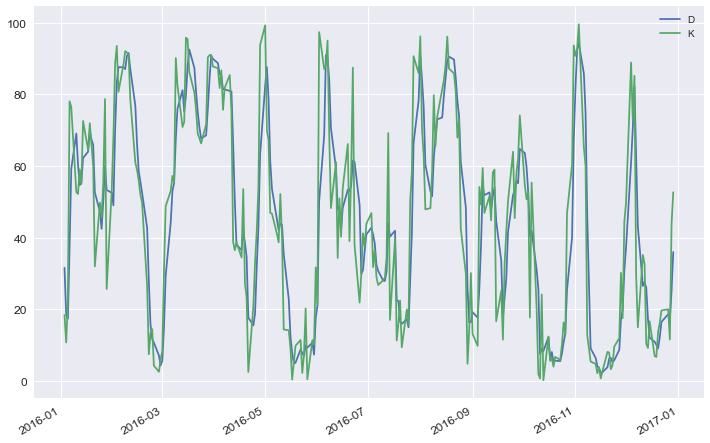

In [18]:
data.loc["2016", ["D", "K"]].plot(figsize = (12, 8), fontsize = 12)
plt.show()

In [19]:
data["position"] = np.where(data["K"] > data["D"], 1, -1)

In [20]:
data

,Open,High,Low,Close,roll_low,roll_high,K,D,position
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN,NaN,-1
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN,NaN,NaN,-1
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN,NaN,NaN,-1
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN,NaN,NaN,-1
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1


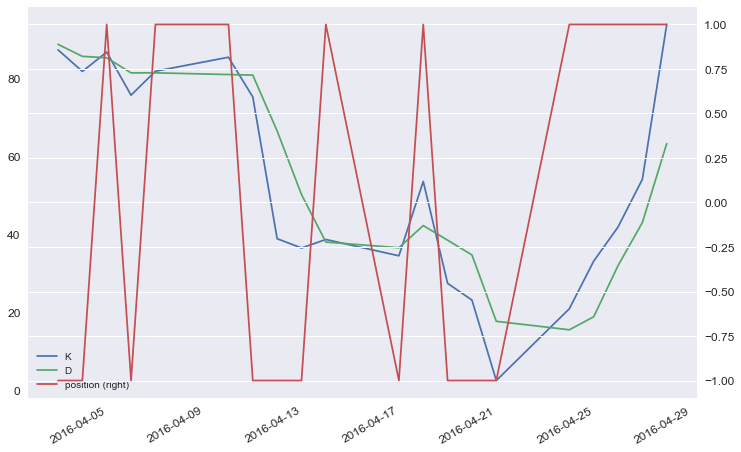

In [21]:
data.loc["04-2016", ["K", "D", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position")
plt.show()

## Vectorized Strategy Backtesting

In [22]:
data

,Open,High,Low,Close,roll_low,roll_high,K,D,position
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN,NaN,-1
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN,NaN,NaN,-1
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN,NaN,NaN,-1
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN,NaN,NaN,-1
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1


In [23]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [24]:
data.dropna(inplace = True)

In [25]:
data

,Open,High,Low,Close,roll_low,roll_high,K,D,position,returns
2008-01-19,1.46204,1.46204,1.45992,1.46035,1.45896,1.49224,4.176683,9.918178,-1,-0.001211
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057


In [26]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [27]:
data

,Open,High,Low,Close,roll_low,roll_high,K,D,position,returns,strategy
2008-01-19,1.46204,1.46204,1.45992,1.46035,1.45896,1.49224,4.176683,9.918178,-1,-0.001211,NaN
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262,0.010262
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034,-0.012034
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068,0.000068
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521,0.008521
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057,0.000057
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484,0.002484
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861,0.002861
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057,0.004057


In [28]:
data.dropna(inplace = True)

In [29]:
ptc = 0.00007

In [30]:
data["trades"] = data.position.diff().fillna(0).abs()

In [31]:
data.trades.value_counts()

0.0    2287
2.0    1508
Name: trades, dtype: int64

In [32]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [33]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [34]:
data

,Open,High,Low,Close,roll_low,roll_high,K,D,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262,0.010262,0.0,0.010262,0.989790,1.010315,1.010315
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034,-0.012034,2.0,-0.012174,1.001774,0.998230,0.998090
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068,0.000068,0.0,0.000068,1.001842,0.998298,0.998158
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521,0.008521,0.0,0.008521,1.010415,1.006841,1.006700
2008-01-24,1.47546,1.47778,1.46610,1.46813,1.43664,1.49224,56.636691,58.039568,-1,-0.005048,-0.005048,2.0,-0.005188,1.005327,1.001771,1.001491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057,0.000057,2.0,-0.000083,0.834382,1.349162,1.092538
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484,0.002484,0.0,0.002484,0.836457,1.352517,1.095255
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861,0.002861,0.0,0.002861,0.838854,1.356392,1.098393
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057,0.004057,0.0,0.004057,0.842264,1.361906,1.102859


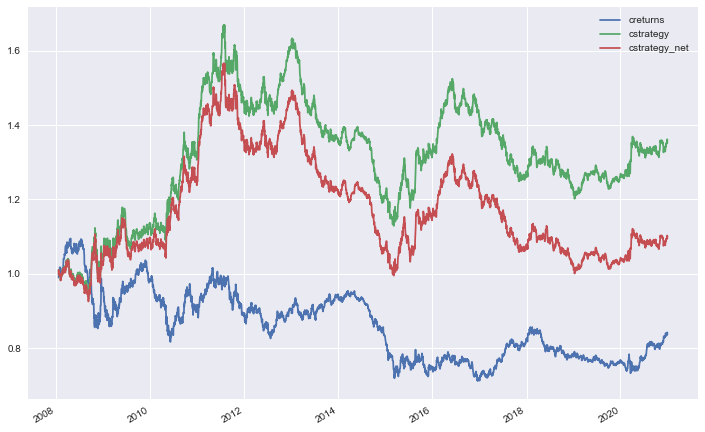

In [35]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

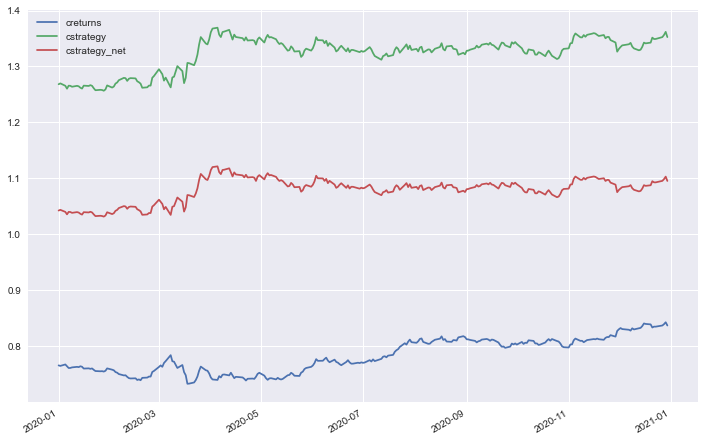

In [36]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

## Using the SOBacktester Class

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [38]:
from SOBacktester import SOBacktester as SO

In [39]:
pd.read_csv("../original/EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [40]:
pd.read_csv("../original/US30_ohlc.csv", parse_dates = [0], index_col = 0)

,Open,High,Low,Close
2008-01-01,13262.9,13303.1,12981.1,13070.7
2008-01-02,13070.8,13125.1,13009.9,13074.6
2008-01-03,13074.7,13112.9,12776.0,12817.8
2008-01-06,12823.6,12891.7,12718.6,12803.5
2008-01-07,12806.5,12894.6,12553.5,12574.5
...,...,...,...,...
2020-12-23,30202.5,30273.0,30123.6,30225.2
2020-12-27,30131.5,30544.6,30121.5,30442.7
2020-12-28,30451.0,30633.0,30300.0,30406.8
2020-12-29,30414.3,30551.4,30344.8,30461.7


In [41]:
pd.read_csv("../original/XAUUSD_ohlc.csv", parse_dates = [0], index_col = 0)

,Open,High,Low,Close
2008-01-01,833.900,861.460,833.900,857.310
2008-01-02,857.350,868.980,853.590,865.010
2008-01-03,865.030,868.840,854.610,859.700
2008-01-05,859.070,859.270,858.670,858.970
2008-01-06,858.670,865.060,855.330,858.190
...,...,...,...,...
2020-12-23,1873.306,1883.725,1869.554,1879.544
2020-12-27,1885.053,1900.296,1869.312,1873.694
2020-12-28,1873.445,1886.454,1871.848,1878.358
2020-12-29,1878.170,1894.598,1876.221,1894.508


In [42]:
ptc = 0.00007

In [43]:
tester = SO("EURUSD", 14, 3, "2008-01-01", "2020-12-31", ptc)

In [44]:
tester

SOBacktester(symbol = EURUSD, periods = 14, D_mw = 3, start = 2008-01-01, end = 2020-12-31)

In [45]:
tester.data

,Open,High,Low,Close,returns,roll_low,roll_high,K,D
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN,NaN,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,0.002471,NaN,NaN,NaN,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,-0.000549,NaN,NaN,NaN,NaN
2008-01-05,1.47451,1.47559,1.47430,1.47465,0.000244,NaN,NaN,NaN,NaN
2008-01-06,1.47465,1.47560,1.46586,1.46954,-0.003471,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,-0.000057,1.20588,1.22728,58.925234,55.623053
2020-12-27,1.21892,1.22504,1.21812,1.22152,0.002484,1.20588,1.22728,73.084112,63.753894
2020-12-28,1.22145,1.22752,1.22086,1.22502,0.002861,1.20588,1.22752,88.447320,73.485555
2020-12-29,1.22508,1.23102,1.22495,1.23000,0.004057,1.20754,1.23102,95.655877,85.729103


In [46]:
tester.test_strategy()

(1.095138, 0.258653)

In [47]:
tester.results

,Open,High,Low,Close,returns,roll_low,roll_high,K,D,position,strategy,trades,creturns,cstrategy
2008-01-20,1.46040,1.46046,1.44218,1.44544,-0.010262,1.44218,1.49224,6.512185,6.728020,-1,0.010262,0.0,0.989790,1.010315
2008-01-21,1.44538,1.46434,1.43664,1.46294,0.012034,1.43664,1.49224,47.302158,19.330342,1,-0.012174,2.0,1.001774,0.998090
2008-01-22,1.46292,1.46844,1.45114,1.46304,0.000068,1.43664,1.49224,47.482014,33.765453,1,0.000068,0.0,1.001842,0.998158
2008-01-23,1.46298,1.47794,1.45912,1.47556,0.008521,1.43664,1.49224,70.000000,54.928058,1,0.008521,0.0,1.010415,1.006700
2008-01-24,1.47546,1.47778,1.46610,1.46813,-0.005048,1.43664,1.49224,56.636691,58.039568,-1,-0.005188,2.0,1.005327,1.001491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,-0.000057,1.20588,1.22728,58.925234,55.623053,1,-0.000083,2.0,0.834382,1.092538
2020-12-27,1.21892,1.22504,1.21812,1.22152,0.002484,1.20588,1.22728,73.084112,63.753894,1,0.002484,0.0,0.836457,1.095255
2020-12-28,1.22145,1.22752,1.22086,1.22502,0.002861,1.20588,1.22752,88.447320,73.485555,1,0.002861,0.0,0.838854,1.098393
2020-12-29,1.22508,1.23102,1.22495,1.23000,0.004057,1.20754,1.23102,95.655877,85.729103,1,0.004057,0.0,0.842264,1.102859


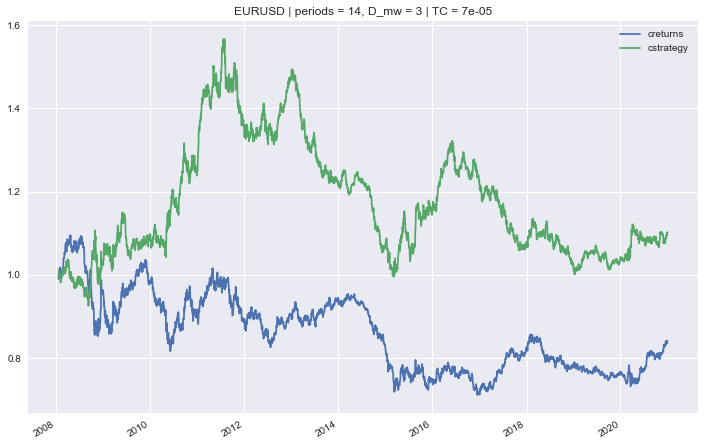

In [48]:
tester.plot_results()

In [49]:
tester.results.trades.value_counts()

0.0    2287
2.0    1508
Name: trades, dtype: int64

In [50]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

(array([27., 11.]), 1.584622)

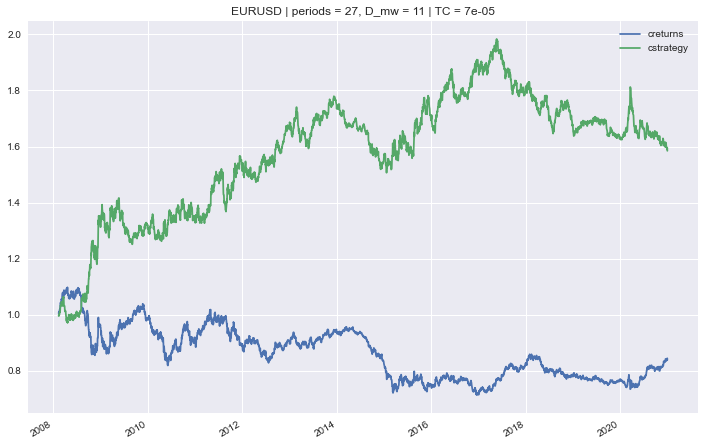

In [51]:
tester.plot_results()

In [52]:
tester.results.trades.value_counts()

0.0    3055
2.0     719
Name: trades, dtype: int64

__XAU / USD__

In [53]:
ptc = 0.00015

In [54]:
tester = SO("XAUUSD", 14, 3, "2008-01-01", "2020-12-31", ptc)

In [55]:
tester.test_strategy()

(2.384475, 0.25701)

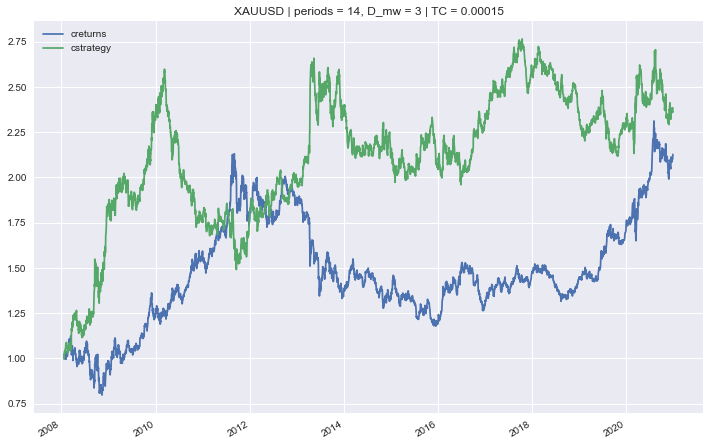

In [56]:
tester.plot_results()

In [57]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

(array([14., 10.]), 4.64632)

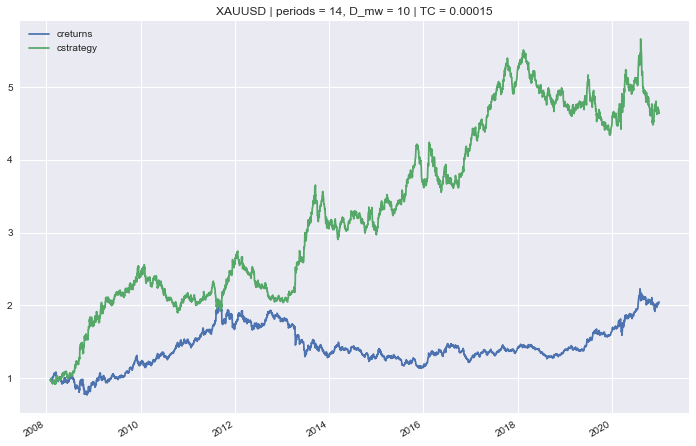

In [58]:
tester.plot_results()

__US30__

In [59]:
ptc = 0.00007

In [60]:
tester = SO("US30", 14, 3, "2008-01-01", "2020-12-31", ptc)

In [61]:
tester.data

,Open,High,Low,Close,returns,roll_low,roll_high,K,D
2008-01-01,13262.9,13303.1,12981.1,13070.7,NaN,NaN,NaN,NaN,NaN
2008-01-02,13070.8,13125.1,13009.9,13074.6,0.000298,NaN,NaN,NaN,NaN
2008-01-03,13074.7,13112.9,12776.0,12817.8,-0.019837,NaN,NaN,NaN,NaN
2008-01-06,12823.6,12891.7,12718.6,12803.5,-0.001116,NaN,NaN,NaN,NaN
2008-01-07,12806.5,12894.6,12553.5,12574.5,-0.018048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-23,30202.5,30273.0,30123.6,30225.2,0.000659,29420.3,30424.7,80.137395,72.743263
2020-12-27,30131.5,30544.6,30121.5,30442.7,0.007170,29420.3,30544.6,90.936583,83.076697
2020-12-28,30451.0,30633.0,30300.0,30406.8,-0.001180,29420.3,30633.0,81.347407,84.140462
2020-12-29,30414.3,30551.4,30344.8,30461.7,0.001804,29420.3,30633.0,85.874495,86.052828


In [62]:
tester.test_strategy()

(0.364894, -2.137021)

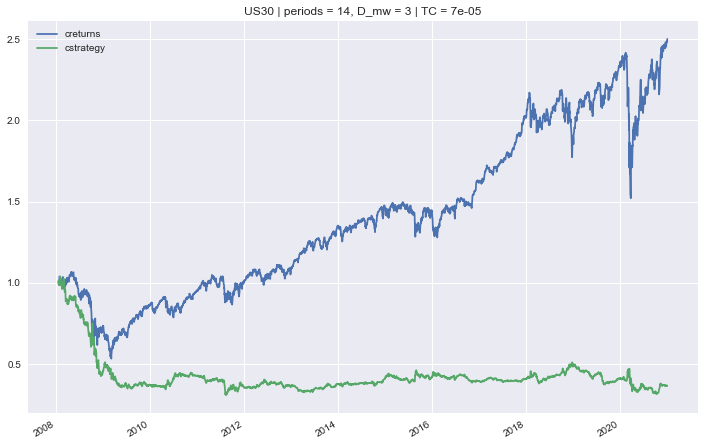

In [63]:
tester.plot_results()

In [64]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

(array([32., 49.]), 2.509286)

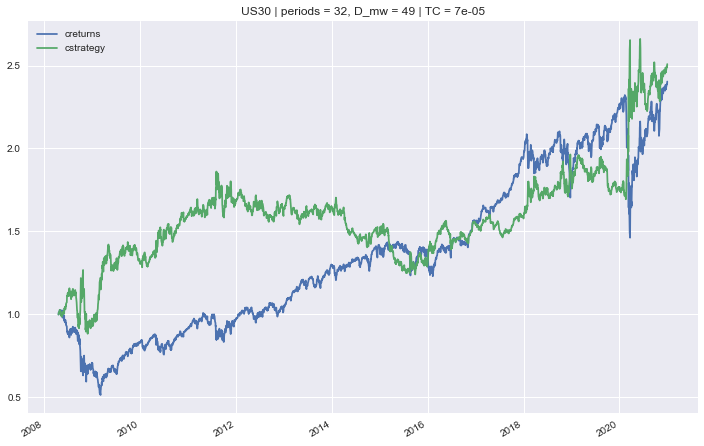

In [65]:
tester.plot_results()

## Alternative Strategies and Interpretations

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")
from SOBacktester import SOBacktester as SO

In [67]:
tester = SO("EURUSD", 27, 11, "2008-01-01", "2020-12-31", 0)

In [68]:
alt = tester.data.dropna()
alt

,Open,High,Low,Close,returns,roll_low,roll_high,K,D
2008-02-12,1.45844,1.45996,1.45318,1.45734,-0.000755,1.43664,1.49534,35.264055,44.475763
2008-02-13,1.45734,1.46470,1.45484,1.46428,0.004751,1.43664,1.49534,47.086882,42.002478
2008-02-14,1.46424,1.47098,1.46312,1.46820,0.002674,1.43664,1.49534,53.764906,40.082081
2008-02-16,1.46777,1.46825,1.46716,1.46799,-0.000143,1.43664,1.49534,53.407155,37.769862
2008-02-17,1.46800,1.46905,1.46112,1.46582,-0.001479,1.43664,1.49534,49.710392,37.930928
...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,-0.000057,1.18002,1.22728,81.400762,90.286576
2020-12-27,1.21892,1.22504,1.21812,1.22152,0.002484,1.18002,1.22728,87.812103,89.743209
2020-12-28,1.22145,1.22752,1.22086,1.22502,0.002861,1.18002,1.22752,94.736842,90.537000
2020-12-29,1.22508,1.23102,1.22495,1.23000,0.004057,1.18002,1.23102,98.000000,91.083465


__Main Strategy: Fast Stochastic (%K) / Slow Stochastic (%D) Crossover__

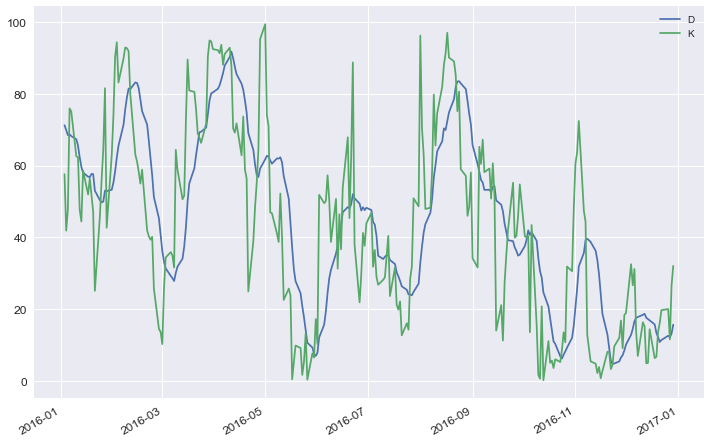

In [69]:
alt.loc["2016", ["D", "K"]].plot(figsize = (12, 8), fontsize = 12)
plt.show()

__Alternative 1: 50-Level Crossover__

In [70]:
alt2 = alt.loc["2016"].copy()

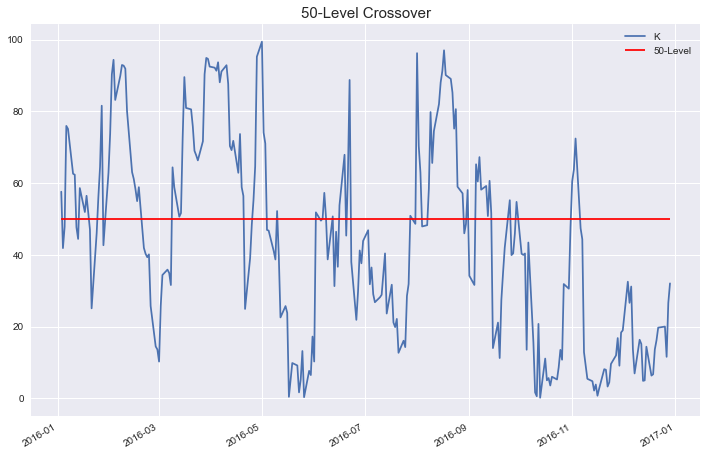

In [71]:
alt2.loc[:, "K"].plot(figsize = (12, 8))
plt.hlines(y = 50, xmin = alt2.index[0], xmax = alt2.index[-1], color = "r", label = "50-Level")
plt.title("50-Level Crossover", fontsize = 15)
plt.legend()
plt.show()

__Alternative 2: Overbought (80) & Oversold (20)__

- if __Fast Stochastic (%K)__ reaches __extreme highs__ (>80) -> __Overbought__
- if __Fast Stochastic (%K)__ reaches __extreme lows__ (<20) -> __Oversold__

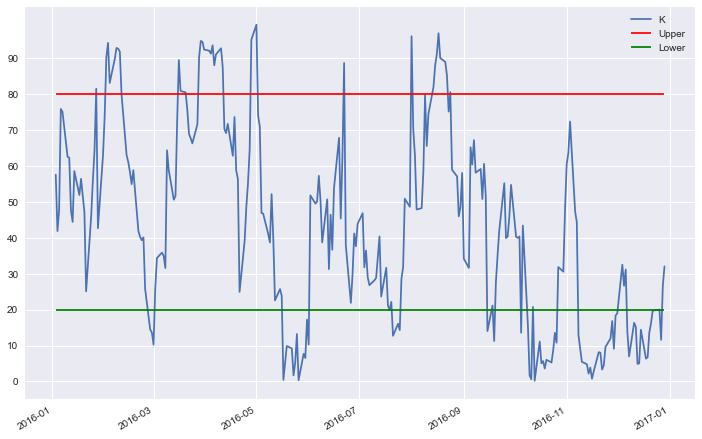

In [72]:
alt2.loc[:, ["K"]].plot(figsize = (12, 8))
plt.hlines(y = 80, xmin = alt2.index[0], xmax = alt2.index[-1], label = "Upper", color = "r")
plt.hlines(y = 20, xmin = alt2.index[0], xmax = alt2.index[-1], label = "Lower", color = "g")
plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()